<a href="https://colab.research.google.com/github/Diego251Fagundes/Data-Science-Machine-Learning-Studies/blob/main/decision_tree_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. IRIS**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Carregamento do Dataset Iris e Separação dos Dados

In [ ]:
# Carregar o dataset Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Dividir o dataset em treino e teste
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do Modelo de Árvore de Decisão

In [ ]:
# Modelo de Árvore de Decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy, dtree_report

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n')

# Criação do Modelo de Floresta Aleatória

In [ ]:
# Modelo de Floresta Aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy, rf_report

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n')

# Adição de Validação Cruzada e Otimização com GridSearchCV

In [ ]:
# Parâmetros para GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV na Árvore de Decisão
grid_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

best_dtree_params = grid_dtree.best_params_
best_dtree_score = grid_dtree.best_score_

# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

best_dtree_params, best_dtree_score, best_rf_params, best_rf_score

({'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 np.float64(0.9333333333333333),
 {'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 np.float64(0.9428571428571428))

# Importância das Features no Melhor Modelo de Floresta Aleatória

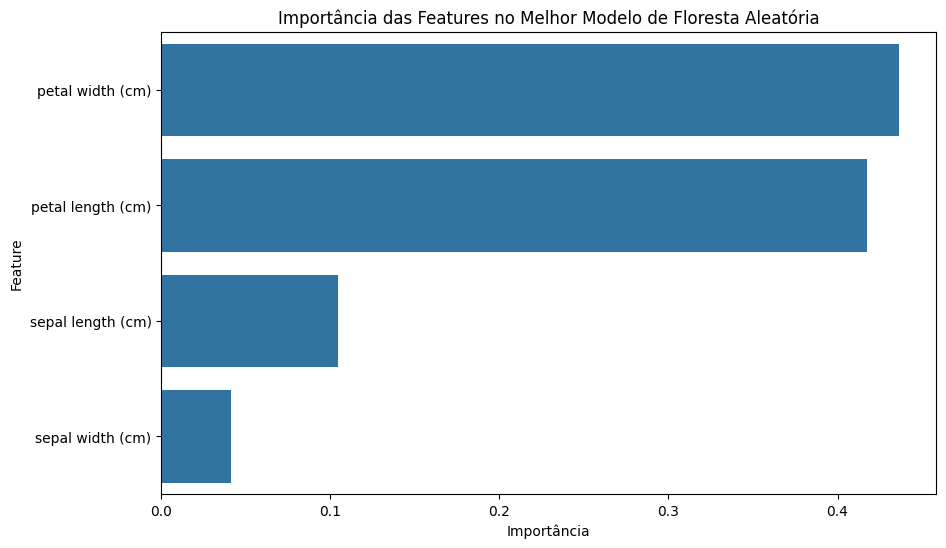

In [ ]:
# Importância das features no melhor modelo de Floresta Aleatória
best_rf = grid_rf.best_estimator_
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Importância das Features no Melhor Modelo de Floresta Aleatória')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# Visualização da Árvore de Decisão

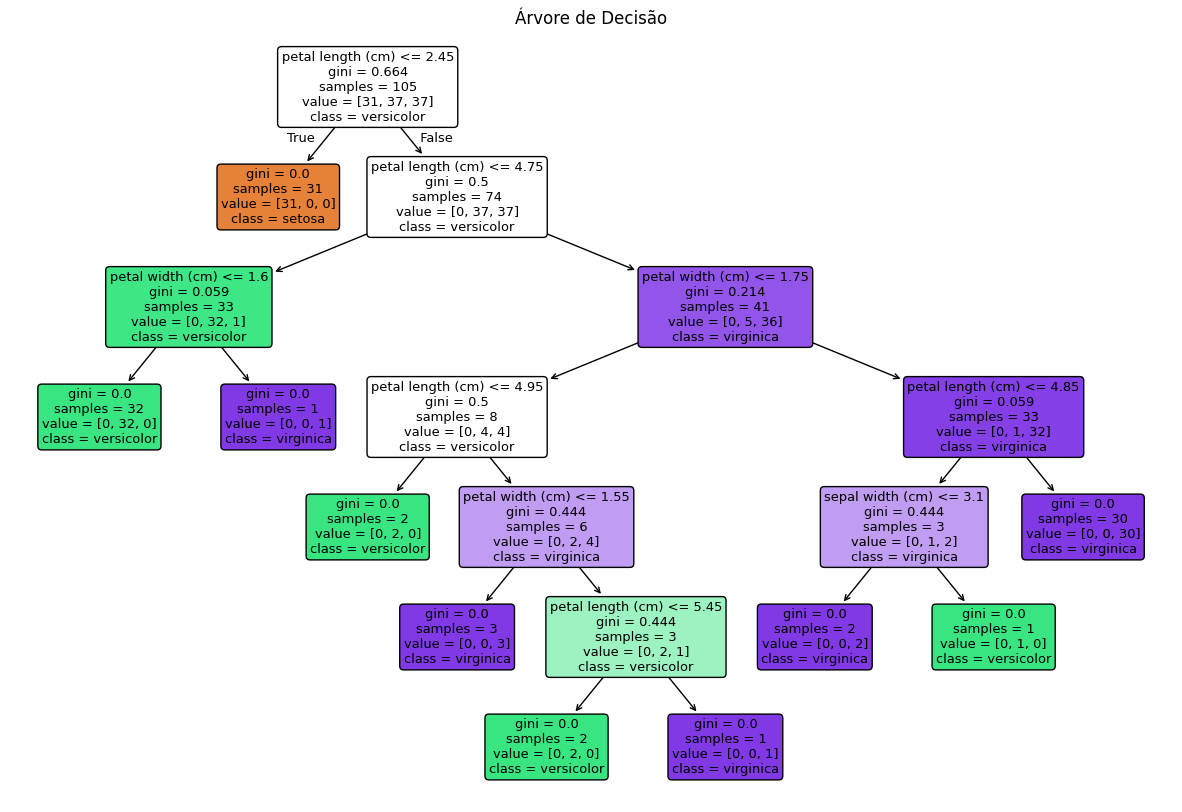

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=iris.target_names, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória

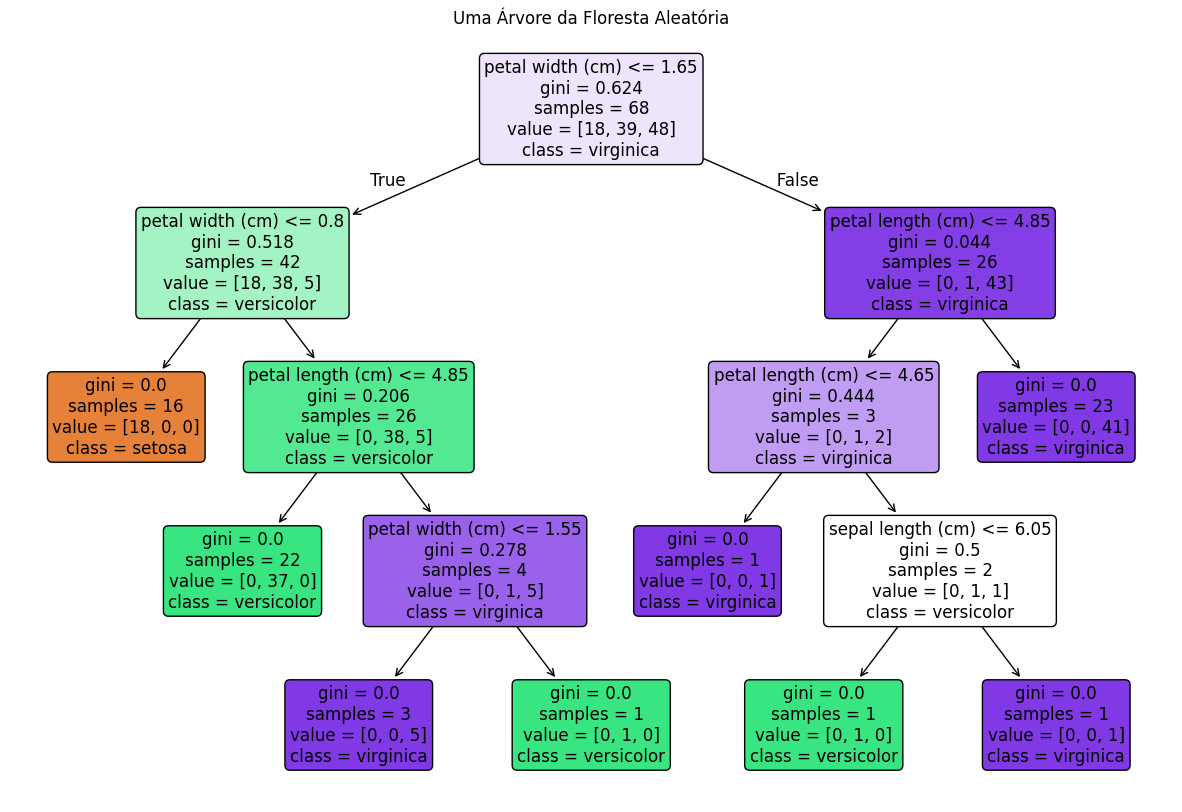

In [ ]:
# Visualizar uma das árvores da floresta aleatória (por exemplo, a primeira árvore)
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Selecionando a primeira árvore da floresta
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=iris.target_names, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()



---


# **2. MUSHROOM**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Carregamento do Dataset Mushroom e Separação dos Dados

In [ ]:
# Carregar o dataset Mushroom do arquivo CSV
mushroom_df = pd.read_csv('mushroom.csv')

# Separar a coluna alvo (geralmente 'class' ou 'target')
# O nome da coluna alvo pode variar dependendo da fonte do dataset.
# Assumindo que a coluna alvo se chama 'class' e contém 'e' (edible) e 'p' (poisonous)
# Vamos mapear para 0 e 1 para uso em modelos.
if 'class' in mushroom_df.columns:
    mushroom_df['target'] = mushroom_df['class'].apply(lambda x: 0 if x == 'e' else 1)
    y = mushroom_df['target']
    X = mushroom_df.drop(['class', 'target'], axis=1) # Remover a coluna original 'class' e a 'target' temporária

    # Aplicar One-Hot Encoding nas features (X)
    X_encoded = pd.get_dummies(X)

    # Dividir o dataset em treino e teste após a codificação
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Criação do Modelo de Árvore de Decisão

In [ ]:
# Modelo de Árvore de Decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy, dtree_report

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1257\n           1       1.00      1.00      1.00      1181\n\n    accuracy                           1.00      2438\n   macro avg       1.00      1.00      1.00      2438\nweighted avg       1.00      1.00      1.00      2438\n')

# Criação do Modelo de Floresta Aleatória

In [ ]:
# Modelo de Floresta Aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy, rf_report

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1257\n           1       1.00      1.00      1.00      1181\n\n    accuracy                           1.00      2438\n   macro avg       1.00      1.00      1.00      2438\nweighted avg       1.00      1.00      1.00      2438\n')

# Adição de Validação Cruzada e Otimização com GridSearchCV

In [ ]:
# Parâmetros para GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV na Árvore de Decisão
grid_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

best_dtree_params = grid_dtree.best_params_
best_dtree_score = grid_dtree.best_score_

# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

best_dtree_params, best_dtree_score, best_rf_params, best_rf_score

({'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2},
 np.float64(1.0),
 {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 np.float64(1.0))

# Importância das Features no Melhor Modelo de Floresta Aleatória

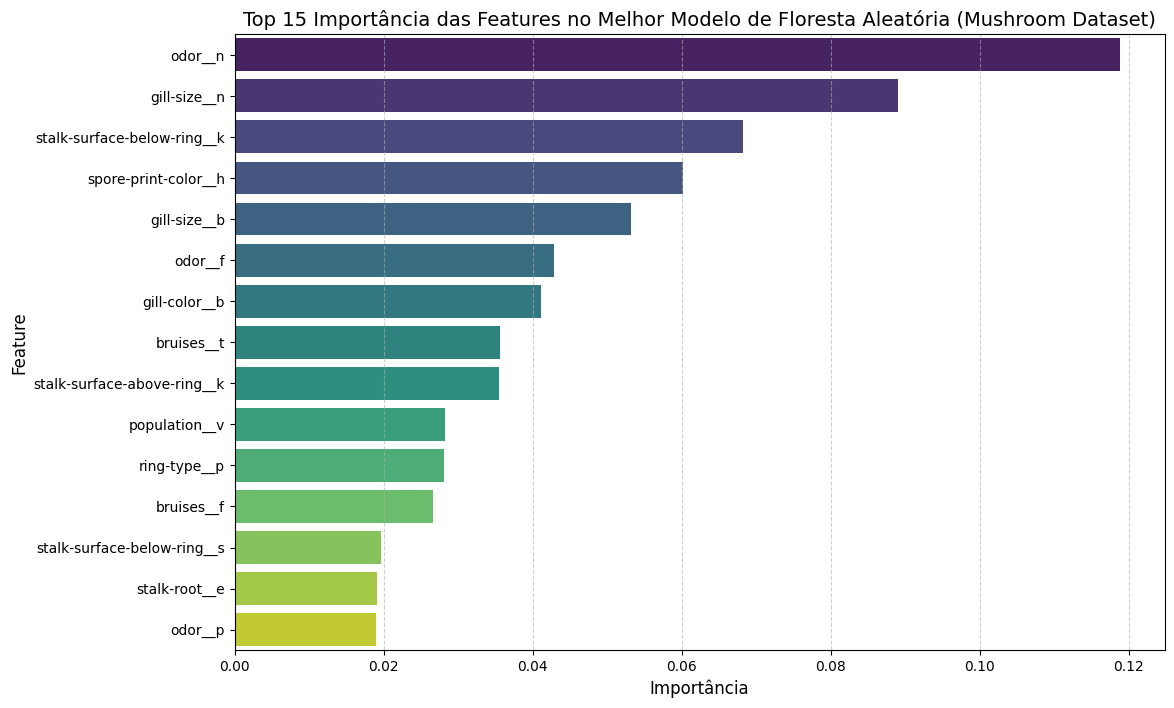

In [ ]:
# Importância das features no melhor modelo de Floresta Aleatória
best_rf = grid_rf.best_estimator_
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X_encoded.columns,  # Usar X_encoded.columns para corresponder às features após One-Hot Encoding
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Selecionar as top N features mais importantes (ex: Top 15)
top_n = 15
top_features = feature_importances.head(top_n)

# Visualizando a importância das features
plt.figure(figsize=(12, 8)) # Aumentar o tamanho da figura para melhor visualização
# Corrigindo o FutureWarning: Passar `palette` sem atribuir `hue`
sns.barplot(x=top_features.Importance, y=top_features.index, palette='viridis', hue=top_features.index, legend=False)
plt.title(f'Top {top_n} Importância das Features no Melhor Modelo de Floresta Aleatória (Mushroom Dataset)', fontsize=14)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adicionar grade para melhor leitura
plt.show()

# Visualização da Árvore de Decisão

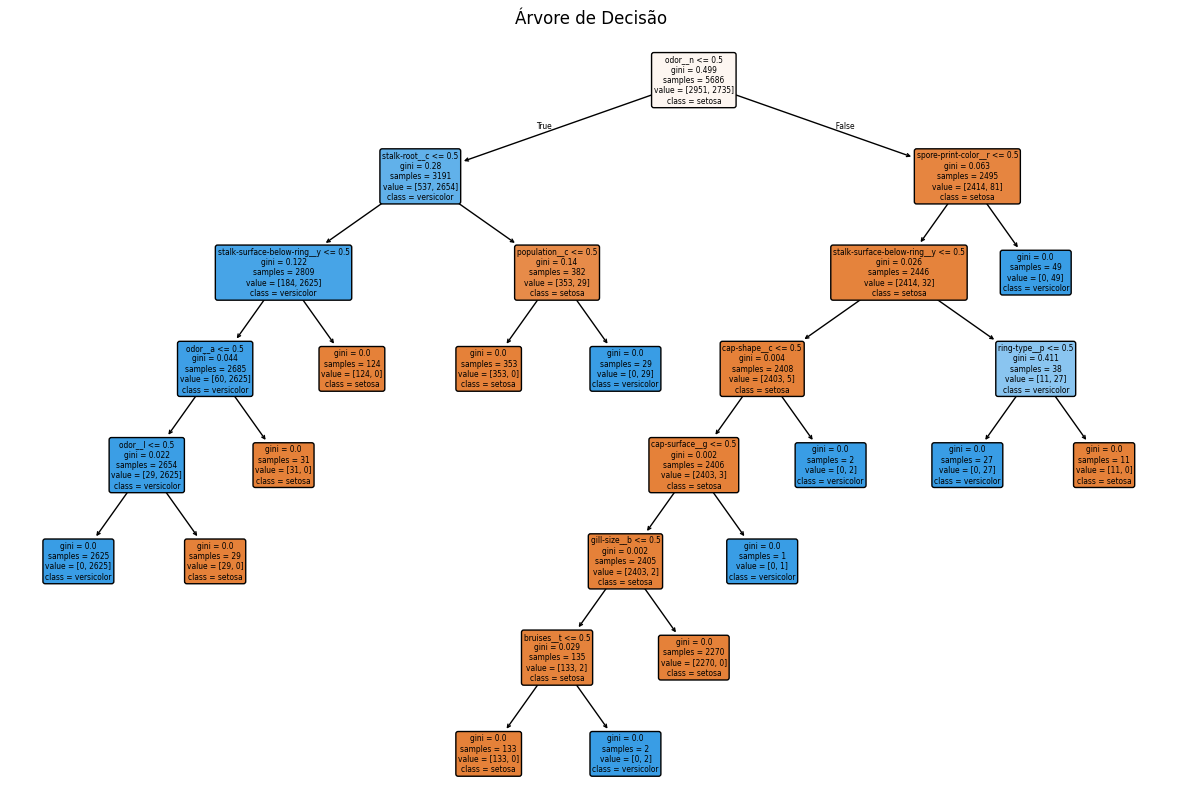

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=iris.target_names, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória

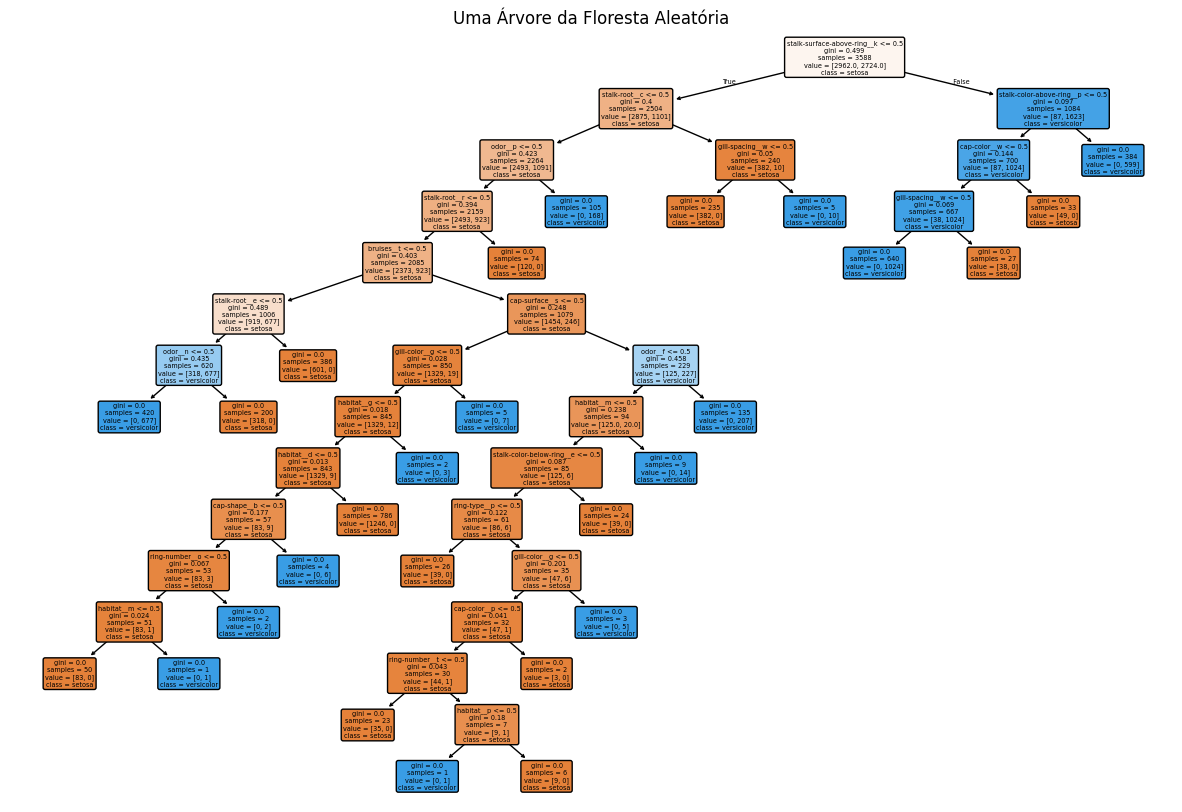

In [ ]:
# Visualizar uma das árvores da floresta aleatória (por exemplo, a primeira árvore)
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Selecionando a primeira árvore da floresta
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=iris.target_names, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()



---


# **3. AUTISTIC SPECTRUM DISORDER**



In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Carregamento do Dataset Autistic Spectrum Disorder e Separação dos Dados

In [ ]:
# Carregar o dataset Autistic Spectrum Disorder do arquivo CSV
asd_df = pd.read_csv('/content/ASD_meta_abundance_discretized (1).csv')

# Separar a coluna alvo (geralmente 'class' ou 'target')
# O nome da coluna alvo pode variar dependendo da fonte do dataset.
# Assumindo que a coluna alvo se chama 'Unnamed: 0' com base na inspeção
if 'Unnamed: 0' in asd_df.columns:
    y = asd_df['Unnamed: 0']
    X = asd_df.drop(['Unnamed: 0'], axis=1) # Remover a coluna original 'Unnamed: 0'

    # Aplicar One-Hot Encoding nas features (X)
    X_encoded = pd.get_dummies(X)

    # Dividir o dataset em treino e teste após a codificação
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)



# Criação do Modelo de Árvore de Decisão

In [ ]:
# Modelo de Árvore de Decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy, dtree_report

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

(0.0,
 '              precision    recall  f1-score   support\n\n        A114       0.00      0.00      0.00       0.0\n        A115       0.00      0.00      0.00       0.0\n        A144       0.00      0.00      0.00       0.0\n        A149       0.00      0.00      0.00       0.0\n          A3       0.00      0.00      0.00       1.0\n         A31       0.00      0.00      0.00       0.0\n          A5       0.00      0.00      0.00       0.0\n         A51       0.00      0.00      0.00       1.0\n         A52       0.00      0.00      0.00       1.0\n         A54       0.00      0.00      0.00       1.0\n         A69       0.00      0.00      0.00       1.0\n         A71       0.00      0.00      0.00       1.0\n         A87       0.00      0.00      0.00       1.0\n          A9       0.00      0.00      0.00       1.0\n         A93       0.00      0.00      0.00       0.0\n          B1       0.00      0.00      0.00       0.0\n        B103       0.00      0.00      0.00       1.0\n

# Criação do Modelo de Floresta Aleatória

In [ ]:
# Modelo de Floresta Aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy, rf_report

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

(0.0,
 '              precision    recall  f1-score   support\n\n        A101       0.00      0.00      0.00       0.0\n        A109       0.00      0.00      0.00       0.0\n        A144       0.00      0.00      0.00       0.0\n        A164       0.00      0.00      0.00       0.0\n          A3       0.00      0.00      0.00       1.0\n         A31       0.00      0.00      0.00       0.0\n         A51       0.00      0.00      0.00       1.0\n         A52       0.00      0.00      0.00       1.0\n         A54       0.00      0.00      0.00       1.0\n          A6       0.00      0.00      0.00       0.0\n         A69       0.00      0.00      0.00       1.0\n         A71       0.00      0.00      0.00       1.0\n         A87       0.00      0.00      0.00       1.0\n          A9       0.00      0.00      0.00       1.0\n        B103       0.00      0.00      0.00       1.0\n        B106       0.00      0.00      0.00       1.0\n        B114       0.00      0.00      0.00       1.0\n

# Adição de Validação Cruzada e Otimização com GridSearchCV

In [ ]:
# Reavaliar os modelos com a divisão treino-teste original

# Avaliar o modelo de Árvore de Decisão
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)

# Avaliar o modelo de Floresta Aleatória
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Avaliação do Modelo de Árvore de Decisão:")
print(f"Acurácia: {dtree_accuracy}")
print(f"Relatório de Classificação:\n{dtree_report}")

print("\nAvaliação do Modelo de Floresta Aleatória:")
print(f"Acurácia: {rf_accuracy}")
print(f"Relatório de Classificação:\n{rf_report}")

Avaliação do Modelo de Árvore de Decisão:
Acurácia: 0.0
Relatório de Classificação:
              precision    recall  f1-score   support

        A114       0.00      0.00      0.00       0.0
        A115       0.00      0.00      0.00       0.0
        A144       0.00      0.00      0.00       0.0
        A149       0.00      0.00      0.00       0.0
          A3       0.00      0.00      0.00       1.0
         A31       0.00      0.00      0.00       0.0
          A5       0.00      0.00      0.00       0.0
         A51       0.00      0.00      0.00       1.0
         A52       0.00      0.00      0.00       1.0
         A54       0.00      0.00      0.00       1.0
         A69       0.00      0.00      0.00       1.0
         A71       0.00      0.00      0.00       1.0
         A87       0.00      0.00      0.00       1.0
          A9       0.00      0.00      0.00       1.0
         A93       0.00      0.00      0.00       0.0
          B1       0.00      0.00      0.00       0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

# Importância das Features no Melhor Modelo de Floresta Aleatória

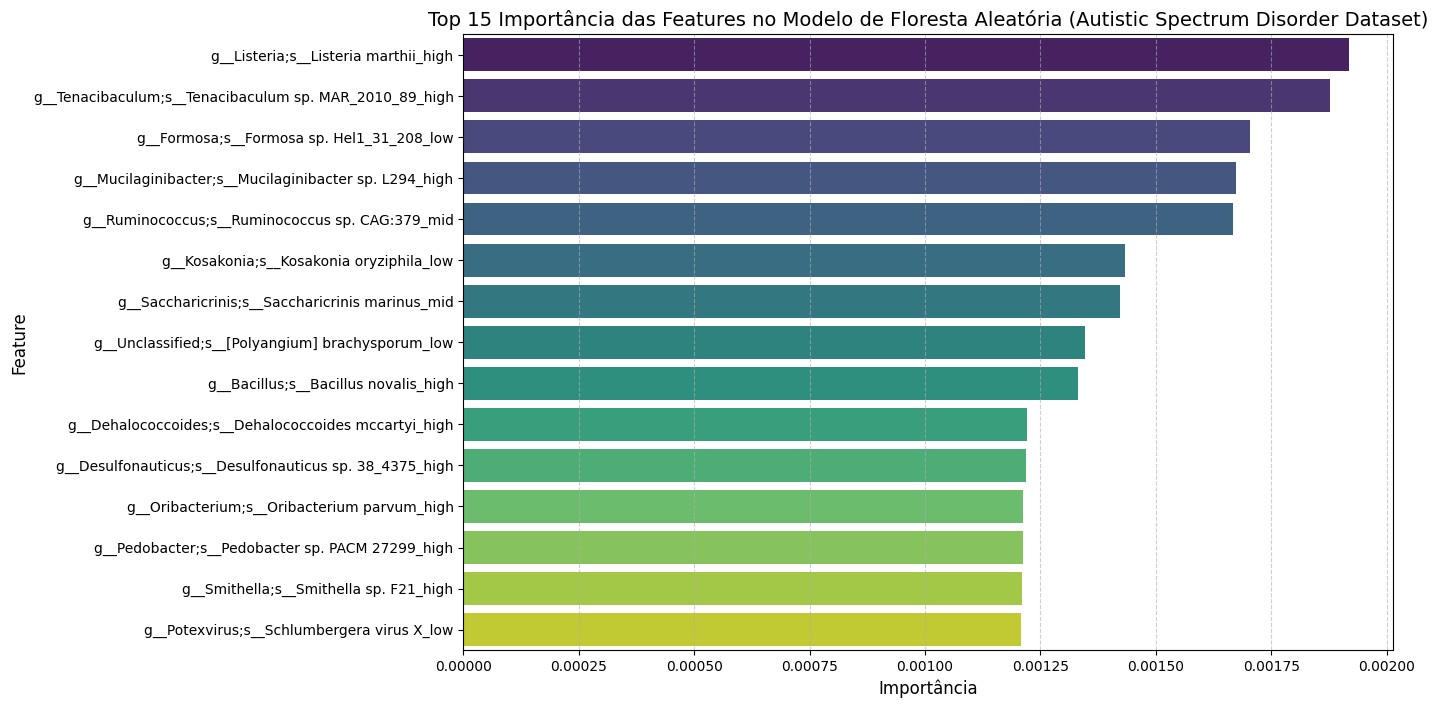

In [ ]:
# Importância das features no melhor modelo de Floresta Aleatória
# Use o modelo 'rf' que já foi treinado
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_encoded.columns,  # Usar X_encoded.columns para corresponder às features após One-Hot Encoding
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Selecionar as top N features mais importantes (ex: Top 15)
top_n = 15
top_features = feature_importances.head(top_n)

# Visualizando a importância das features
plt.figure(figsize=(12, 8)) # Aumentar o tamanho da figura para melhor visualização
# Corrigindo o FutureWarning: Passar `palette` sem atribuir `hue`
sns.barplot(x=top_features.Importance, y=top_features.index, palette='viridis', hue=top_features.index, legend=False)
plt.title(f'Top {top_n} Importância das Features no Modelo de Floresta Aleatória (Autistic Spectrum Disorder Dataset)', fontsize=14)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adicionar grade para melhor leitura
plt.show()

# Visualização da Árvore de Decisão

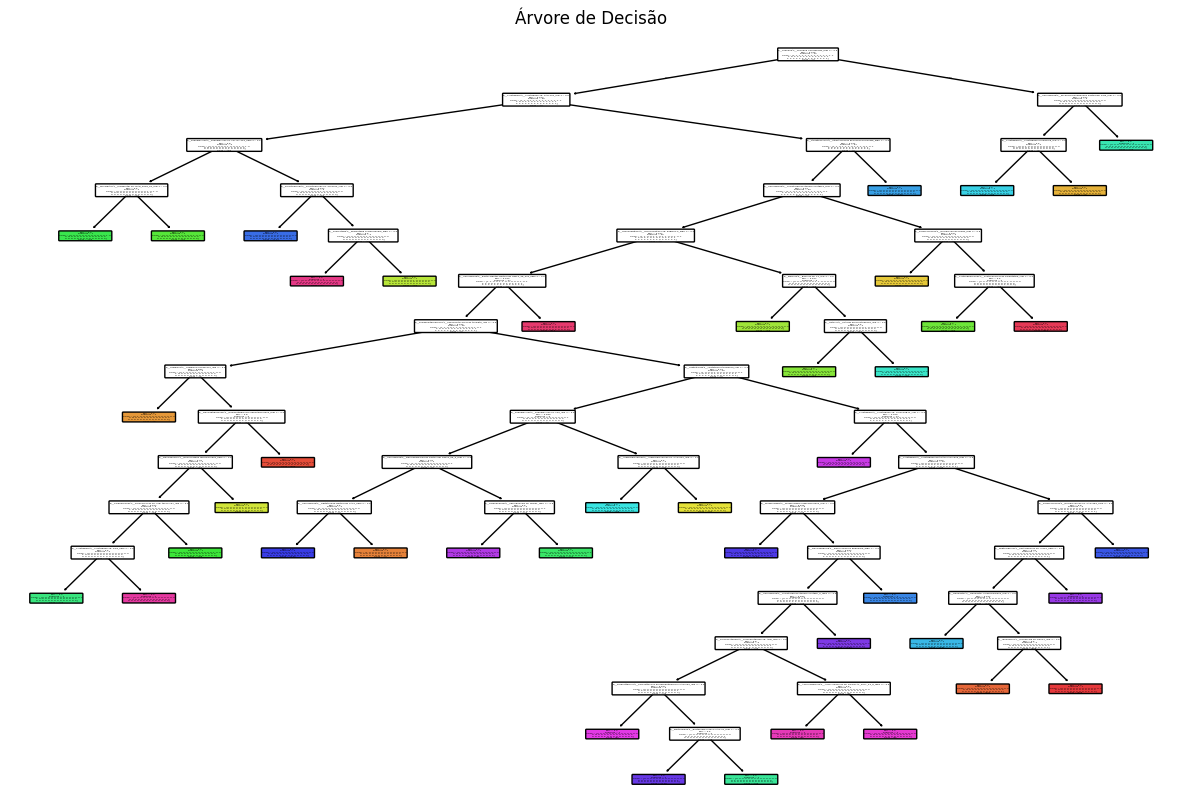

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
# É necessário definir 'class_names' com base nas classes reais do seu dataset 'y'
# Exemplo: se y contém strings como 'ASD' e 'Non-ASD', você pode defini-los manualmente
# Ou, se 'y' contiver valores numéricos, mapeá-los para nomes descritivos.
# Assumindo que 'y' contém nomes de classes únicas que podem ser usados diretamente:
class_names = y.unique().astype(str).tolist() # Usar valores únicos de y como nomes das classes

plot_tree(dtree, filled=True, feature_names=X_encoded.columns, class_names=class_names, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória

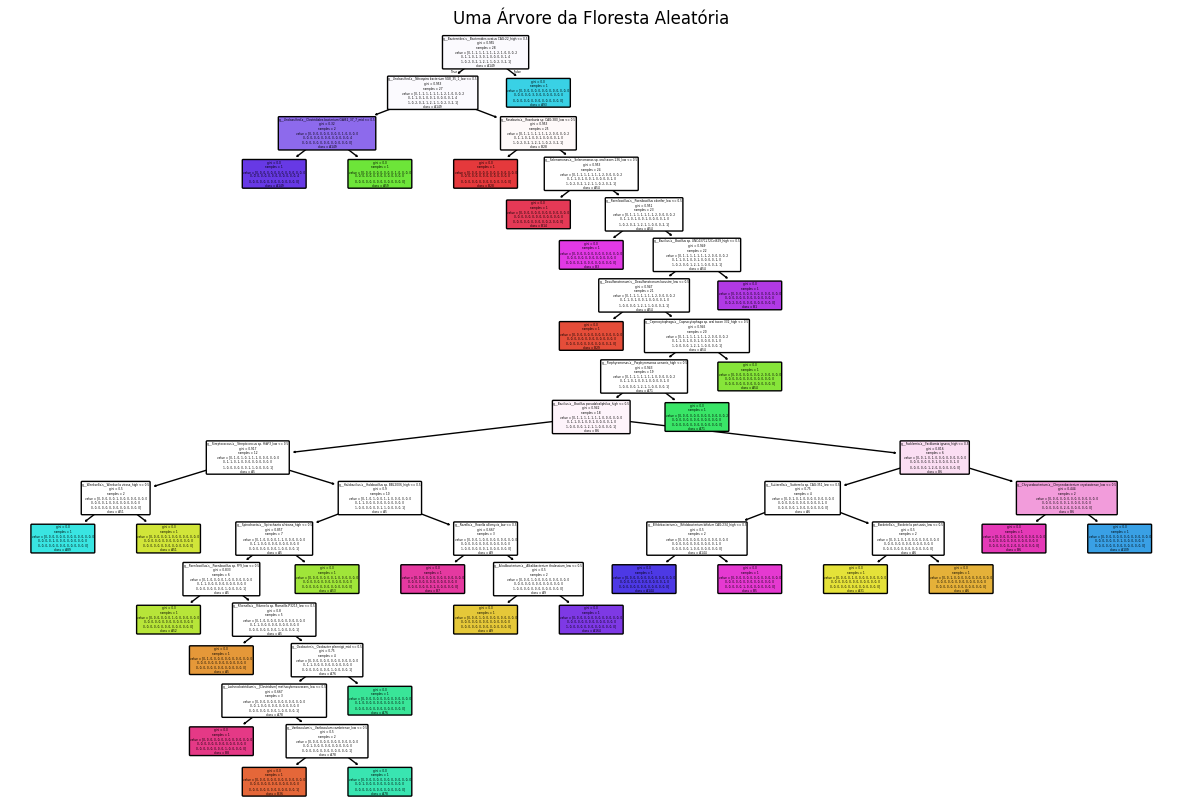

In [ ]:
# Visualizar uma das árvores da floresta aleatória (por exemplo, a primeira árvore)
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Selecionando a primeira árvore da floresta
# Usar os nomes das classes do dataset asd_df, similar ao que foi feito para a árvore de decisão
class_names = y.unique().astype(str).tolist()
plot_tree(estimator, filled=True, feature_names=X_encoded.columns, class_names=class_names, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()



---


# **4. BREAST CANCER WISCONSIN**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

# Carregamento do Dataset Breast Cancer Wisconsin e Separação dos Dados

In [ ]:
# Carregar o dataset Breast Cancer Wisconsin
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')


# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do Modelo de Árvore de Decisão

In [ ]:
# Modelo de Árvore de Decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy, dtree_report

(0.9415204678362573,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.92        63\n           1       0.97      0.94      0.95       108\n\n    accuracy                           0.94       171\n   macro avg       0.93      0.94      0.94       171\nweighted avg       0.94      0.94      0.94       171\n')

# Criação do Modelo de Floresta Aleatória

In [ ]:
# Modelo de Floresta Aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy, rf_report

(0.9707602339181286,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96        63\n           1       0.96      0.99      0.98       108\n\n    accuracy                           0.97       171\n   macro avg       0.97      0.96      0.97       171\nweighted avg       0.97      0.97      0.97       171\n')

# Adição de Validação Cruzada e Otimização com GridSearchCV

In [ ]:
# Parâmetros para GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV na Árvore de Decisão
grid_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

best_dtree_params = grid_dtree.best_params_
best_dtree_score = grid_dtree.best_score_

# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

best_dtree_params, best_dtree_score, best_rf_params, best_rf_score

({'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 np.float64(0.9246518987341773),
 {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
 np.float64(0.9572151898734177))

# Importância das Features no Melhor Modelo de Floresta Aleatória

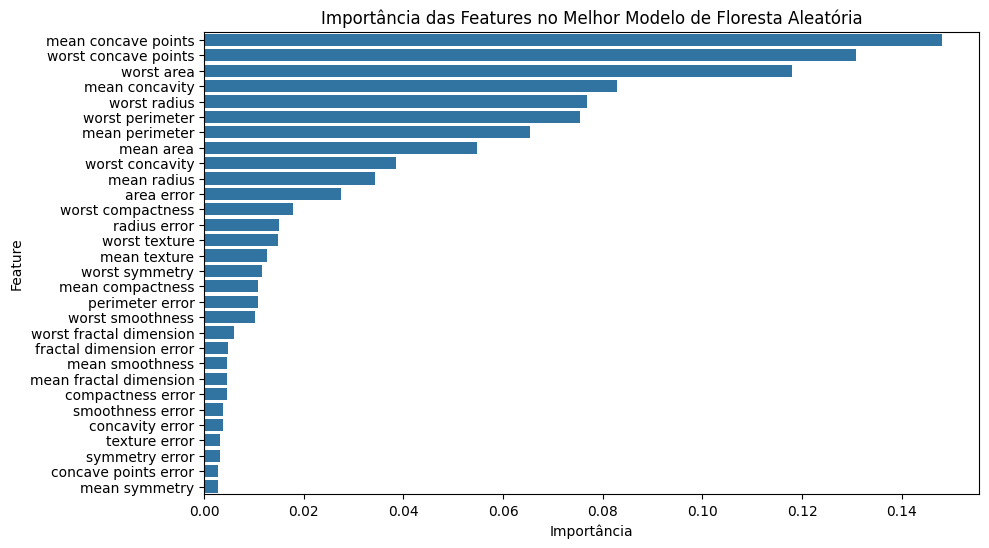

In [ ]:
# Importância das features no melhor modelo de Floresta Aleatória
best_rf = grid_rf.best_estimator_
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Importância das Features no Melhor Modelo de Floresta Aleatória')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# Visualização da Árvore de Decisão

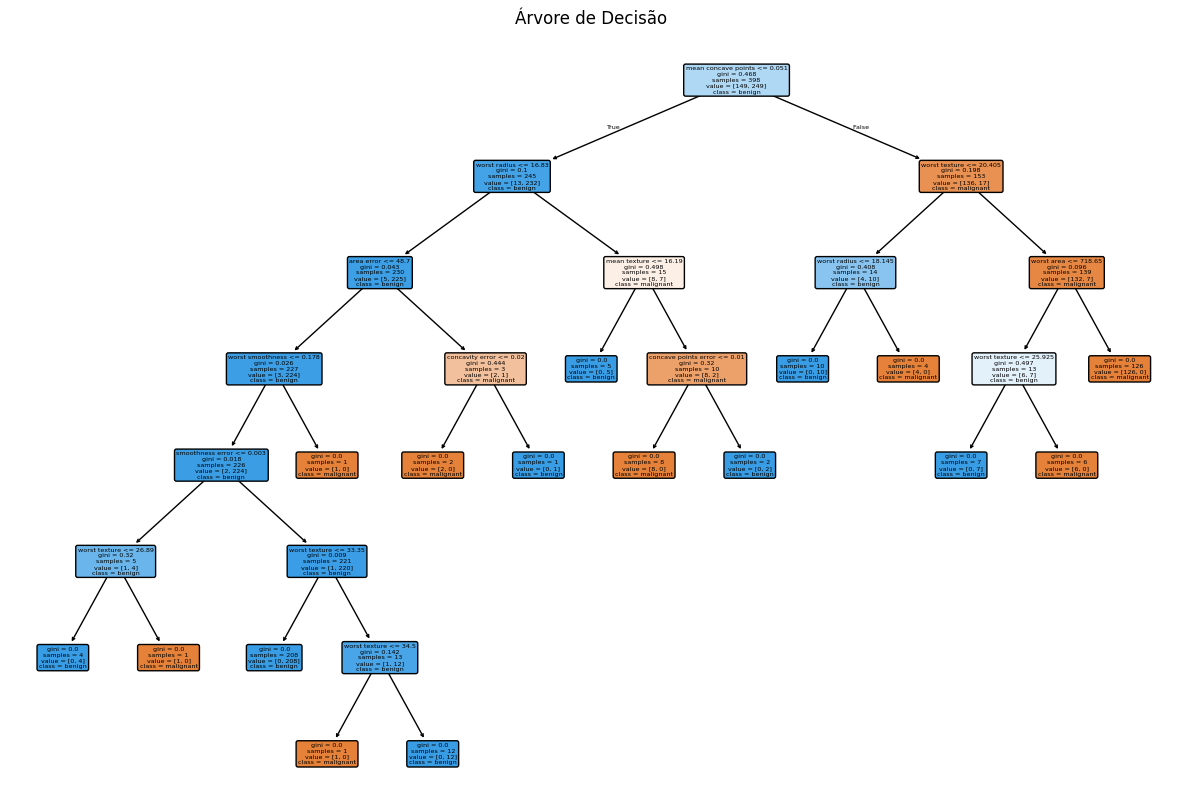

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
class_names = breast_cancer.target_names.tolist() # Usar valores únicos de y como nomes das classes

plot_tree(dtree, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória

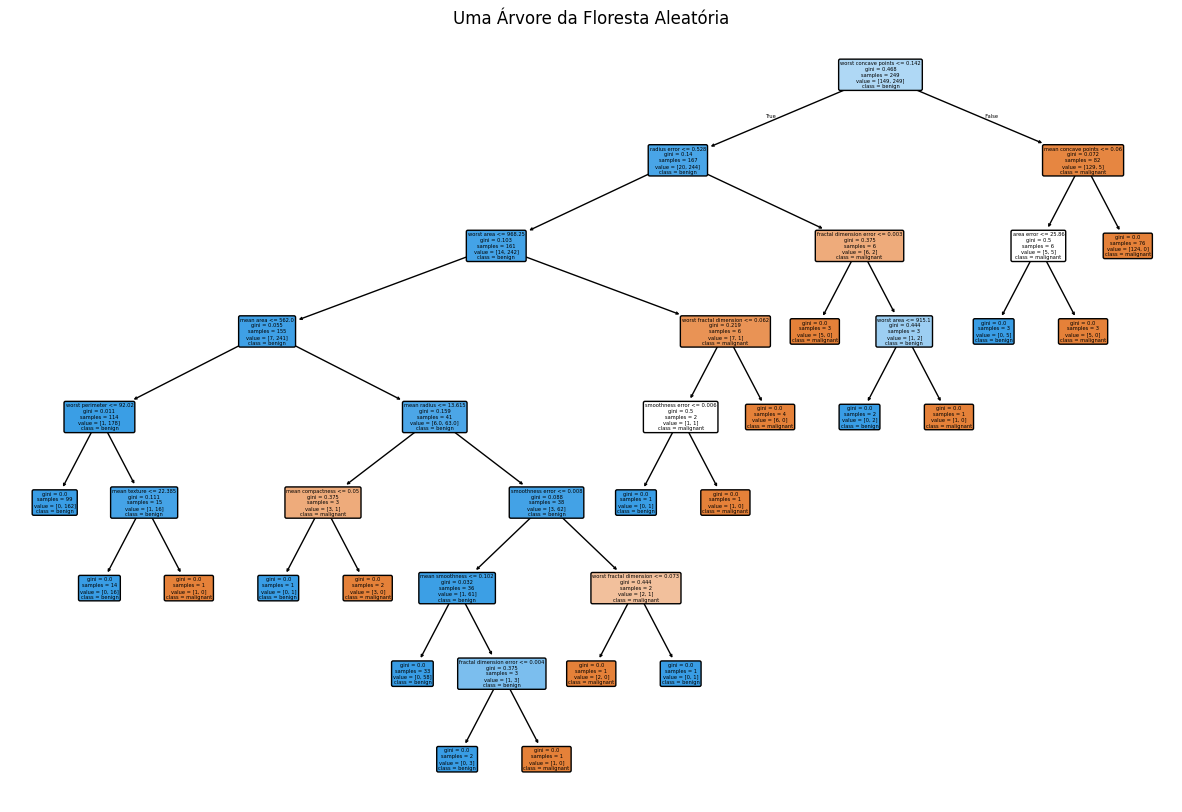

In [ ]:
# Visualizar uma das árvores da floresta aleatória (por exemplo, a primeira árvore)
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Selecionando a primeira árvore da floresta
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=breast_cancer.target_names, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()



---


# **5. WINE**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_wine

# Carregamento do Dataset Wine e Separação dos Dados

In [ ]:
# Carregar o dataset Breast Cancer Wisconsin
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')


# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do Modelo de Árvore de Decisão

In [ ]:
# Modelo de Árvore de Decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy, dtree_report

(0.9629629629629629,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95        19\n           1       0.95      1.00      0.98        21\n           2       1.00      0.93      0.96        14\n\n    accuracy                           0.96        54\n   macro avg       0.97      0.96      0.96        54\nweighted avg       0.96      0.96      0.96        54\n')

# Criação do Modelo de Floresta Aleatória

In [ ]:
# Modelo de Floresta Aleatória
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy, rf_report

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        21\n           2       1.00      1.00      1.00        14\n\n    accuracy                           1.00        54\n   macro avg       1.00      1.00      1.00        54\nweighted avg       1.00      1.00      1.00        54\n')

# Adição de Validação Cruzada e Otimização com GridSearchCV

In [ ]:
# Parâmetros para GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV na Árvore de Decisão
grid_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

best_dtree_params = grid_dtree.best_params_
best_dtree_score = grid_dtree.best_score_

# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

best_dtree_params, best_dtree_score, best_rf_params, best_rf_score

({'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 np.float64(0.9353333333333333),
 {'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 np.float64(0.976))

# Importância das Features no Melhor Modelo de Floresta Aleatória

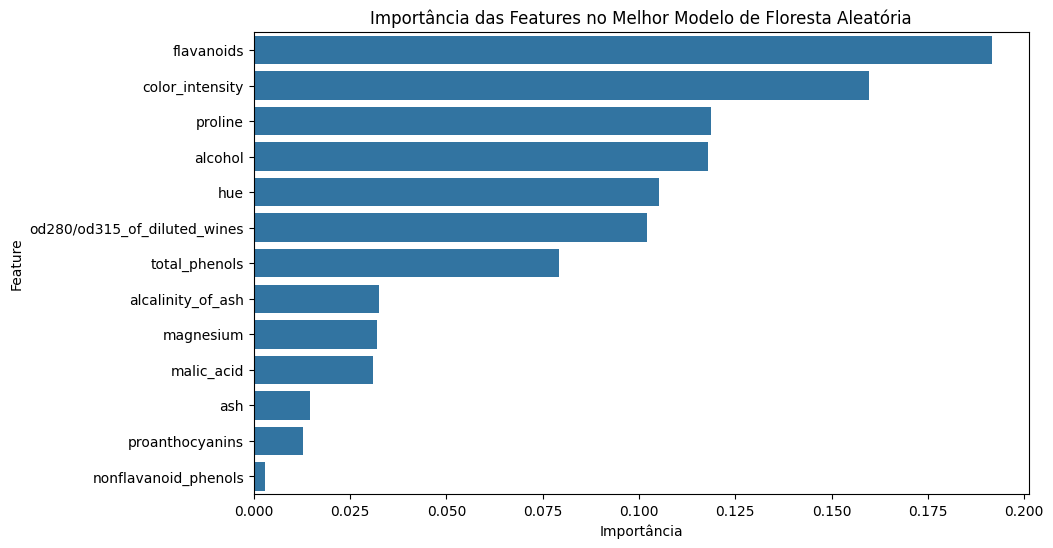

In [ ]:
# Importância das features no melhor modelo de Floresta Aleatória
best_rf = grid_rf.best_estimator_
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Importância das Features no Melhor Modelo de Floresta Aleatória')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# Visualização da Árvore de Decisão

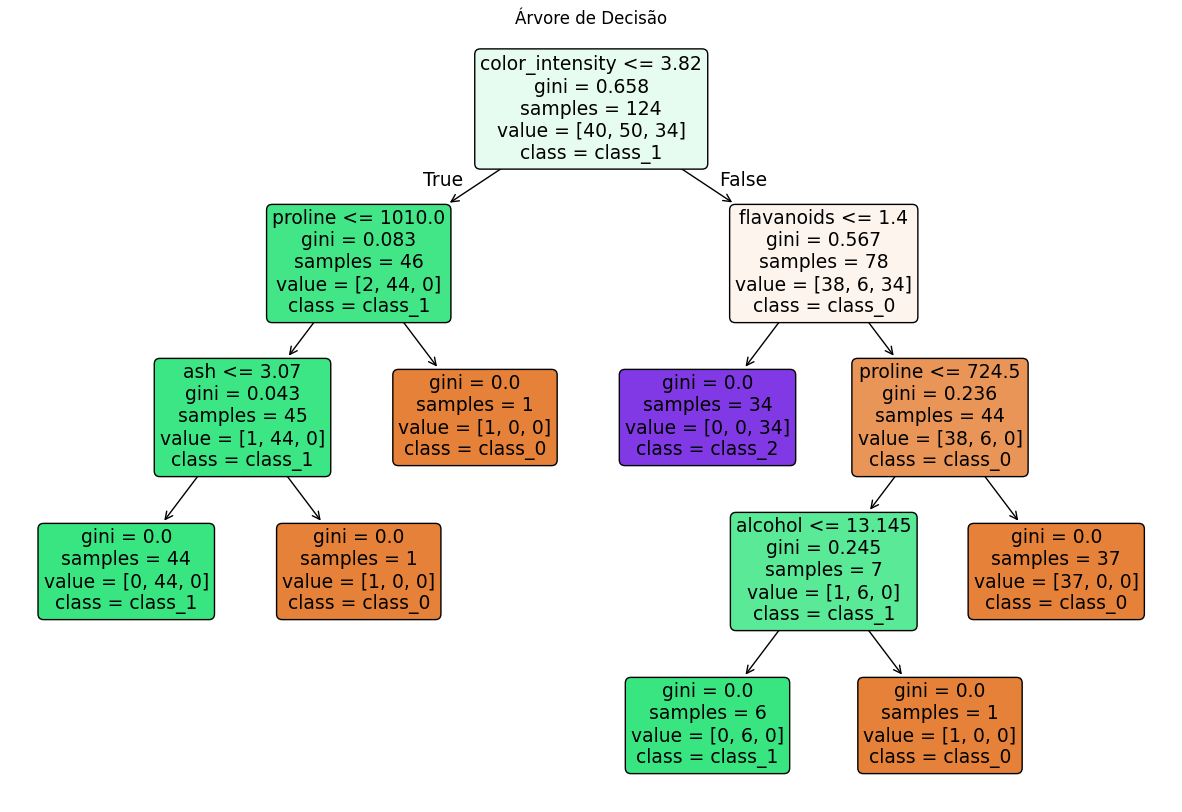

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=wine.target_names, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória

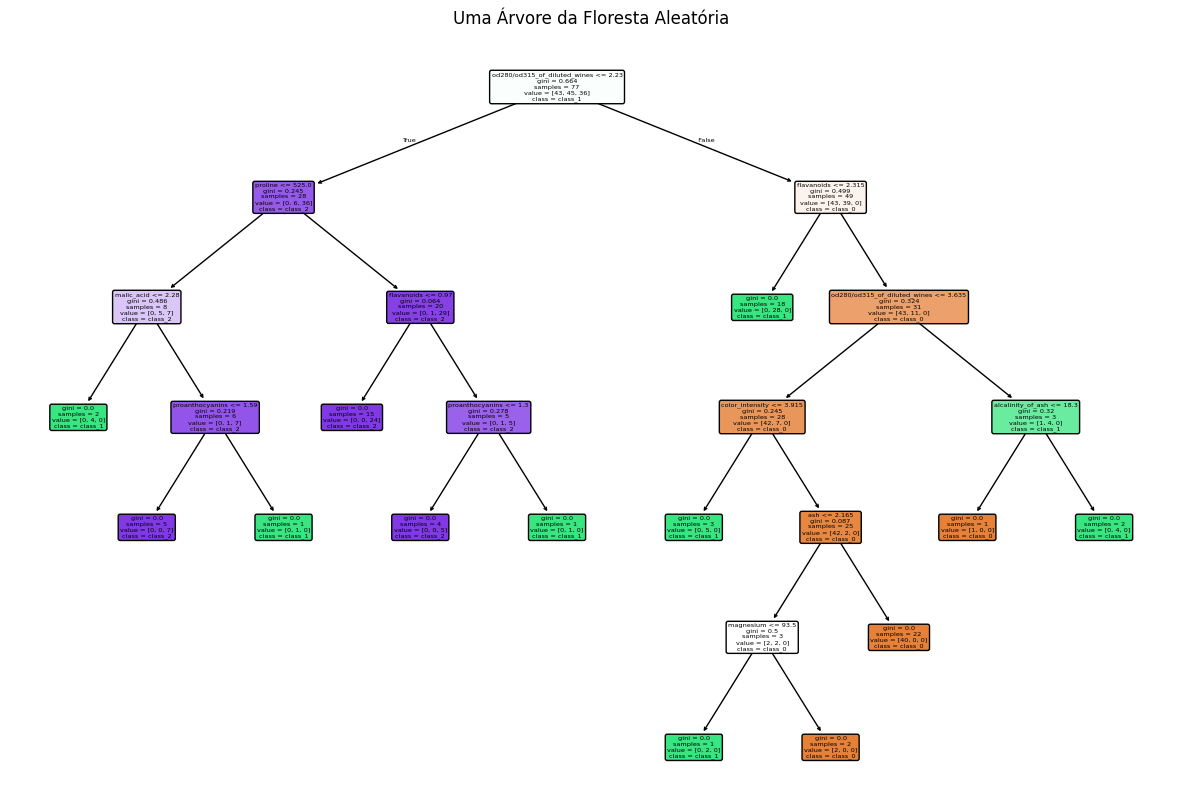

In [ ]:
# Visualizar uma das árvores da floresta aleatória (por exemplo, a primeira árvore)
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Selecionando a primeira árvore da floresta
plot_tree(estimator, filled=True, feature_names=X.columns, class_names=wine.target_names, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()


---

# **6. Pima Indians Diabetes Database**

In [ ]:
# Importando o necessário
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento do Dataset Pima Indians Diabetes e Separação dos Dados
pima_diabetes = load_diabetes()

# Carregar o dataset em um DataFrame
X = pd.DataFrame(pima_diabetes.data, columns=pima_diabetes.feature_names)
y = pd.Series(pima_diabetes.target, name='target')

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do Modelo de Árvore de Decisão

In [ ]:
# Modelo de Árvore de Decisão (Regressão)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo usando métricas de regressão
dtree_mse = mean_squared_error(y_test, y_pred_dtree)
dtree_r2 = r2_score(y_test, y_pred_dtree)

print("Avaliação do Modelo de Árvore de Decisão:")
print(f"Mean Squared Error: {dtree_mse}")
print(f"R-squared: {dtree_r2}")

Avaliação do Modelo de Árvore de Decisão:
Mean Squared Error: 5697.789473684211
R-squared: -0.05547696148647652


# Criação do Modelo de Floresta Aleatória

In [ ]:
# Modelo de Floresta Aleatória (Regressão)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo usando métricas de regressão
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Avaliação do Modelo de Floresta Aleatória:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

Avaliação do Modelo de Floresta Aleatória:
Mean Squared Error: 2859.641982706767
R-squared: 0.47027066465218703


# Adição de Validação Cruzada e Otimização com GridSearchCV

In [ ]:
# Importando os regressores necessários
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score

# Parâmetros para GridSearchCV (para Regressão)
param_grid_dtree_reg = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Usando 'neg_mean_squared_error' como scoring para regressão (GridSearchCV maximiza, então usamos o negativo)
# Ou podemos usar 'r2'
scoring_metric = 'r2'

# GridSearchCV na Árvore de Decisão (Regressão)
grid_dtree_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dtree_reg, cv=5, scoring=scoring_metric)
grid_dtree_reg.fit(X_train, y_train)

best_dtree_params_reg = grid_dtree_reg.best_params_
best_dtree_score_reg = grid_dtree_reg.best_score_

# Parâmetros para GridSearchCV na Floresta Aleatória (Regressão)
param_grid_rf_reg = {
    'n_estimators': [50, 100, 200], # Added 200 estimators
    'max_depth': [3, 5, 10, None], # Added None
    'min_samples_split': [2, 5, 10], # Added 10
    'min_samples_leaf': [1, 2, 4] # Added 4
}


grid_rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_reg, cv=5, scoring=scoring_metric)
grid_rf_reg.fit(X_train, y_train)

best_rf_params_reg = grid_rf_reg.best_params_
best_rf_score_reg = grid_rf_reg.best_score_

print("Melhores parâmetros e score para Árvore de Decisão (Regressão):")
print(f"Parâmetros: {best_dtree_params_reg}")
print(f"Score ({scoring_metric}): {best_dtree_score_reg}")

print("\nMelhores parâmetros e score para Floresta Aleatória (Regressão):")
print(f"Parâmetros: {best_rf_params_reg}")
print(f"Score ({scoring_metric}): {best_rf_score_reg}")

Melhores parâmetros e score para Árvore de Decisão (Regressão):
Parâmetros: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Score (r2): 0.3079300638666279

Melhores parâmetros e score para Floresta Aleatória (Regressão):
Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Score (r2): 0.4017396528122495


# Importância das Features no Melhor Modelo de Floresta Aleatória

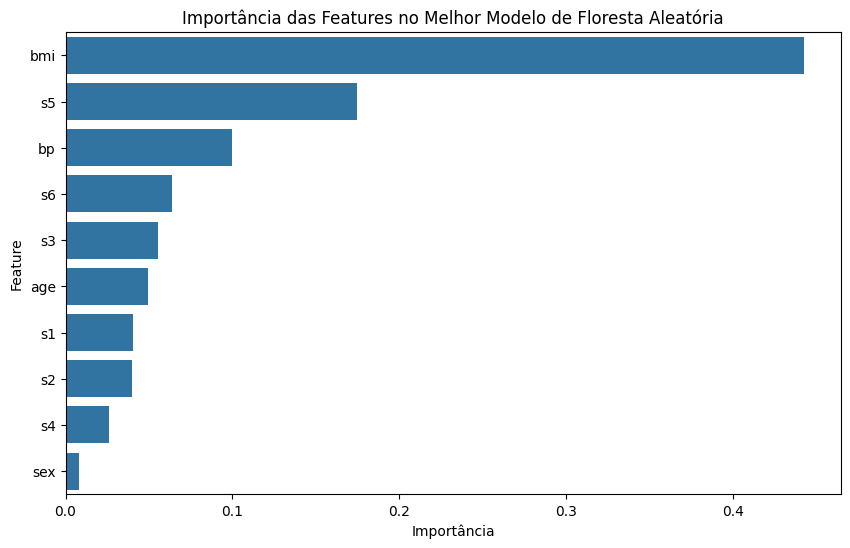

In [ ]:
best_rf = grid_rf_reg.best_estimator_ # Corrigido de grid_rf para grid_rf_reg
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Importância das Features no Melhor Modelo de Floresta Aleatória')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# Visualização da Árvore de Decisão

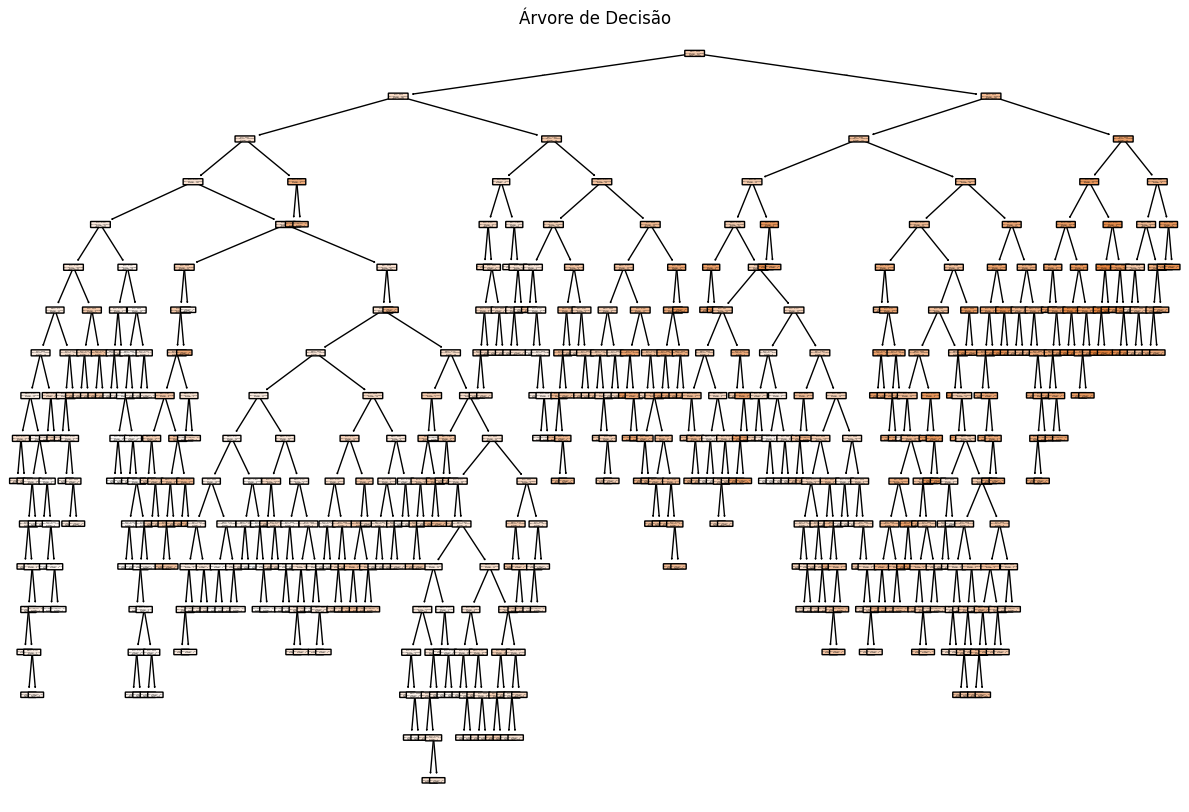

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória

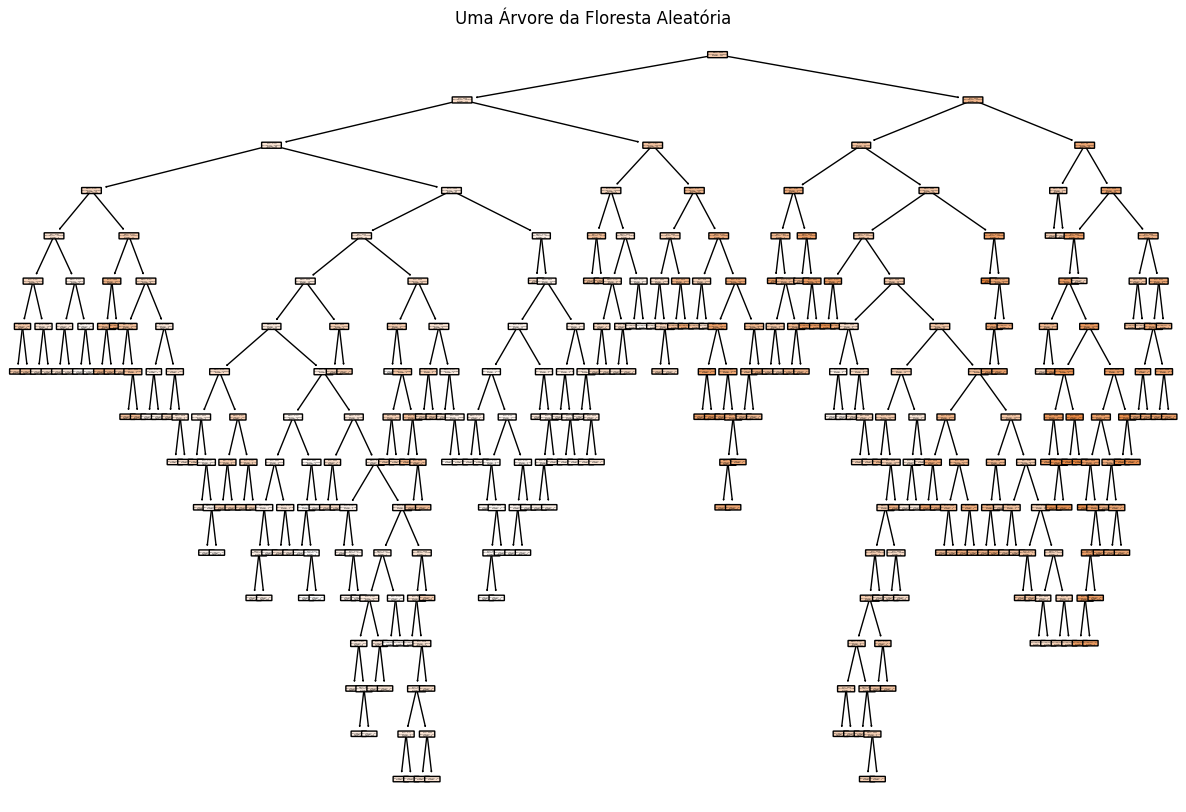

In [ ]:
# Visualizar uma das árvores da floresta aleatória
plt.figure(figsize=(15, 10))
estimator = rf.estimators_[0]  # Selecionando a primeira árvore da floresta
plot_tree(estimator, filled=True, feature_names=X.columns, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória")
plt.show()

# 7. **FISHMORPH Dataset Family

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Carregamento do Dataset Fishmorph e Separação dos Dados

In [ ]:
# Carregar o dataset Family do FISHMORPH do arquivo CSV
family_df = pd.read_csv('FISHMORPH_Family_Dataset.csv')

# Assumindo que 'Family' é a coluna alvo e as outras colunas são features.
# Vamos inspecionar as primeiras linhas para confirmar as colunas.
print("Primeiras linhas do dataset Family:")
display(family_df.head())

# Identificar a coluna alvo e as features.
y_family = family_df['Family']
X_family = family_df.drop('Family', axis=1)

# Aplicar One-Hot Encoding nas features (X) para lidar com colunas categóricas.
X_family_encoded = pd.get_dummies(X_family)

# Dividir o dataset codificado em treino e teste para Family
X_train_family, X_test_family, y_train_family, y_test_family = train_test_split(X_family_encoded, y_family, test_size=0.3, random_state=42)

Primeiras linhas do dataset Family:


MBl       BEl       VEp       REs       OGp       RMl       BLs  \
0  130.0  4.579113  0.622642  0.375019  0.622642  0.868659  0.484981   
1   11.5  2.796068  0.650700  0.353780  0.509800  0.411157  0.722461   
2    6.6  4.564329  0.518187  0.312002  0.203985  0.413221  0.591495   
3   10.9  4.390422  0.548247  0.244804  0.168959  0.324728  0.642991   
4   18.9  4.410271  0.542353  0.292058  0.183790  0.398567  0.685672   

        PFv       PFs       CPt      Family  
0  0.273585  0.144108  3.348991  Cyprinidae  
1  0.330169  0.221095  2.525592   Cichlidae  
2  0.105517  0.188193  2.104580  Cyprinidae  
3  0.097450  0.193049  1.787062  Cyprinidae  
4  0.087643  0.170648  2.968906  Cyprinidae

# Criação do Modelo de Árvore de Decisão para FISHMORPH (Family)

In [ ]:
# Modelo de Árvore de Decisão para o dataset FISHMORPH (Family)
dtree_family = DecisionTreeClassifier(random_state=42)
dtree_family.fit(X_train_family, y_train_family)

# Fazer previsões no conjunto de teste
y_pred_dtree_family = dtree_family.predict(X_test_family)

# Avaliar o modelo
dtree_accuracy_family = accuracy_score(y_test_family, y_pred_dtree_family)
dtree_report_family = classification_report(y_test_family, y_pred_dtree_family)

print("Avaliação do Modelo de Árvore de Decisão para FISHMORPH (Family):")
print(f"Acurácia: {dtree_accuracy_family}")
print(f"Relatório de Classificação:\n{dtree_report_family}")

Avaliação do Modelo de Árvore de Decisão para FISHMORPH (Family):
Acurácia: 0.4590491410307631
Relatório de Classificação:
                     precision    recall  f1-score   support

     Abyssocottidae       0.14      0.25      0.18         4
  Acestrorhynchidae       0.33      0.25      0.29         4
          Achiridae       0.00      0.00      0.00         3
      Acipenseridae       1.00      0.71      0.83         7
   Adrianichthyidae       0.40      1.00      0.57         2
           Akysidae       0.00      0.00      0.00         3
          Alestidae       0.15      0.17      0.16        24
         Ambassidae       0.33      0.29      0.31         7
     Amblycipitidae       0.00      0.00      0.00         5
       Amblyopsidae       0.00      0.00      0.00         1
       Ambylopsidae       0.00      0.00      0.00         1
        Amphiliidae       0.45      0.64      0.53        14
        Anabantidae       0.06      0.12      0.08         8
        Anablepidae   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

# Criação do Modelo de Floresta Aleatória para FISHMORPH (Family)

In [ ]:
# Modelo de Floresta Aleatória para o dataset FISHMORPH (Family)
rf_family = RandomForestClassifier(n_estimators=100, random_state=42)
rf_family.fit(X_train_family, y_train_family)

# Fazer previsões no conjunto de teste
y_pred_rf_family = rf_family.predict(X_test_family)

# Avaliar o modelo
rf_accuracy_family = accuracy_score(y_test_family, y_pred_rf_family)
rf_report_family = classification_report(y_test_family, y_pred_rf_family)

print("Avaliação do Modelo de Floresta Aleatória para FISHMORPH (Family):")
print(f"Acurácia: {rf_accuracy_family}")
print(f"Relatório de Classificação:\n{rf_report_family}")

Avaliação do Modelo de Floresta Aleatória para FISHMORPH (Family):
Acurácia: 0.61286456252497
Relatório de Classificação:
                     precision    recall  f1-score   support

     Abyssocottidae       0.00      0.00      0.00         4
  Acestrorhynchidae       0.80      1.00      0.89         4
          Achiridae       0.00      0.00      0.00         3
      Acipenseridae       0.83      0.71      0.77         7
   Adrianichthyidae       1.00      0.50      0.67         2
           Akysidae       0.00      0.00      0.00         3
          Alestidae       0.00      0.00      0.00        24
         Ambassidae       0.75      0.43      0.55         7
     Amblycipitidae       0.00      0.00      0.00         5
       Amblyopsidae       0.00      0.00      0.00         1
       Ambylopsidae       0.00      0.00      0.00         1
        Amphiliidae       0.60      0.64      0.62        14
        Anabantidae       1.00      0.12      0.22         8
        Anablepidae    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

# Adição de Validação Cruzada e Otimização com GridSearchCV para FISHMORPH (Family)

In [ ]:
# Parâmetros para GridSearchCV na Árvore de Decisão (Family)
param_grid_dtree_family = {
    'max_depth': [3, 5, 10], # Reduzido o espaço de busca
    'min_samples_split': [2, 5], # Reduzido o espaço de busca
    'min_samples_leaf': [1, 2] # Reduzido o espaço de busca
}

# GridSearchCV na Árvore de Decisão (Family)
# Reduzido cv para 3 para acelerar
grid_dtree_family = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dtree_family, cv=3, scoring='accuracy')
grid_dtree_family.fit(X_train_family, y_train_family)

best_dtree_params_family = grid_dtree_family.best_params_
best_dtree_score_family = grid_dtree_family.best_score_

print("Melhores parâmetros e score para Árvore de Decisão (Family):")
print(f"Parâmetros: {best_dtree_params_family}")
print(f"Score (Acurácia): {best_dtree_score_family}")

# Parâmetros para GridSearchCV na Floresta Aleatória (Family)
param_grid_rf_family = {
    'n_estimators': [50, 100], # Reduzido o número máximo de estimadores
    'max_depth': [3, 5, 10], # Reduzido o espaço de busca
    'min_samples_split': [2, 5], # Reduzido o espaço de busca
    'min_samples_leaf': [1, 2] # Reduzido o espaço de busca
}

# GridSearchCV na Floresta Aleatória (Family)
# Reduzido cv para 3 para acelerar
grid_rf_family = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf_family, cv=3, scoring='accuracy')
grid_rf_family.fit(X_train_family, y_train_family)

best_rf_params_family = grid_rf_family.best_params_
best_rf_score_family = grid_rf_family.best_score_

print("\nMelhores parâmetros e score para Floresta Aleatória (Family):")
print(f"Parâmetros: {best_rf_params_family}")
print(f"Score (Acurácia): {best_rf_score_family}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Melhores parâmetros e score para Árvore de Decisão (Family):
Parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score (Acurácia): 0.48758237521802944


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



Melhores parâmetros e score para Floresta Aleatória (Family):
Parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Score (Acurácia): 0.586230465330575


# Importância das Features no Melhor Modelo de Floresta Aleatória

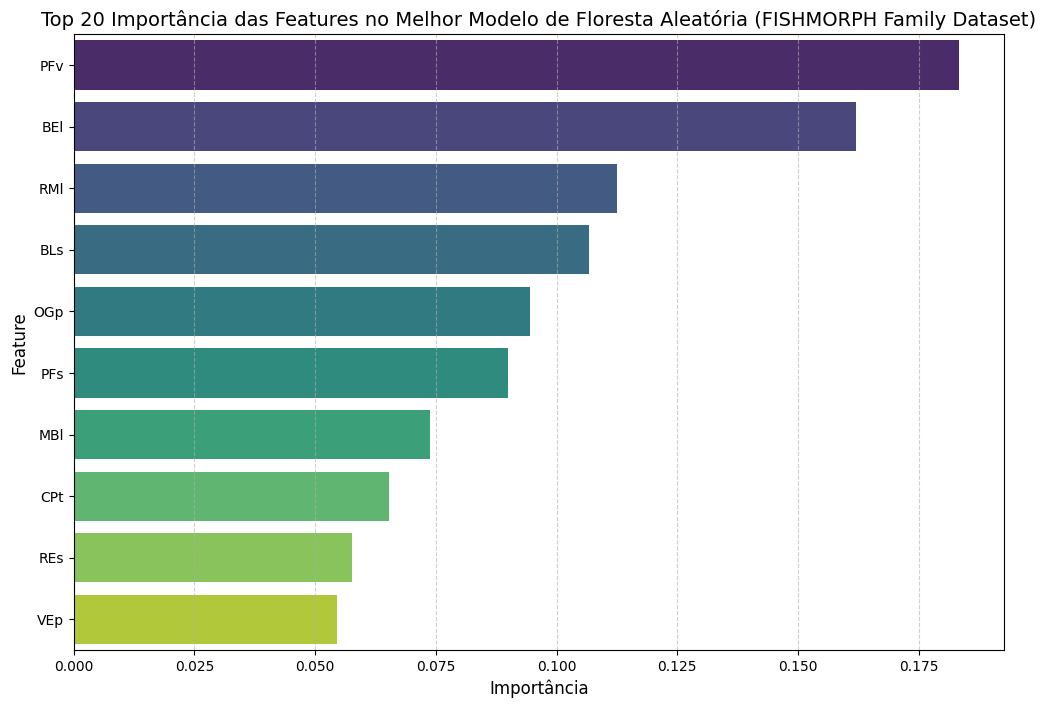

In [ ]:
# Importância das features no melhor modelo de Floresta Aleatória para FISHMORPH (Family)
# Usamos o melhor estimador encontrado pelo GridSearchCV
best_rf_family_model = grid_rf_family.best_estimator_

feature_importances_family = pd.DataFrame(best_rf_family_model.feature_importances_,
                                          index=X_family_encoded.columns,  # Usar X_family_encoded.columns para corresponder às features após One-Hot Encoding
                                          columns=['Importance']).sort_values('Importance', ascending=False)

# Selecionar as top N features mais importantes (ex: Top 15 ou Top 20, ajuste conforme necessário)
top_n_family = 20
top_features_family = feature_importances_family.head(top_n_family)

# Visualizando a importância das features
plt.figure(figsize=(12, 8)) # Aumentar o tamanho da figura para melhor visualização
# Corrigindo o FutureWarning: Passar `palette` sem atribuir `hue`
sns.barplot(x=top_features_family.Importance, y=top_features_family.index, palette='viridis', hue=top_features_family.index, legend=False)
plt.title(f'Top {top_n_family} Importância das Features no Melhor Modelo de Floresta Aleatória (FISHMORPH Family Dataset)', fontsize=14)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adicionar grade para melhor leitura
plt.show()

# Visualização da Árvore de Decisão

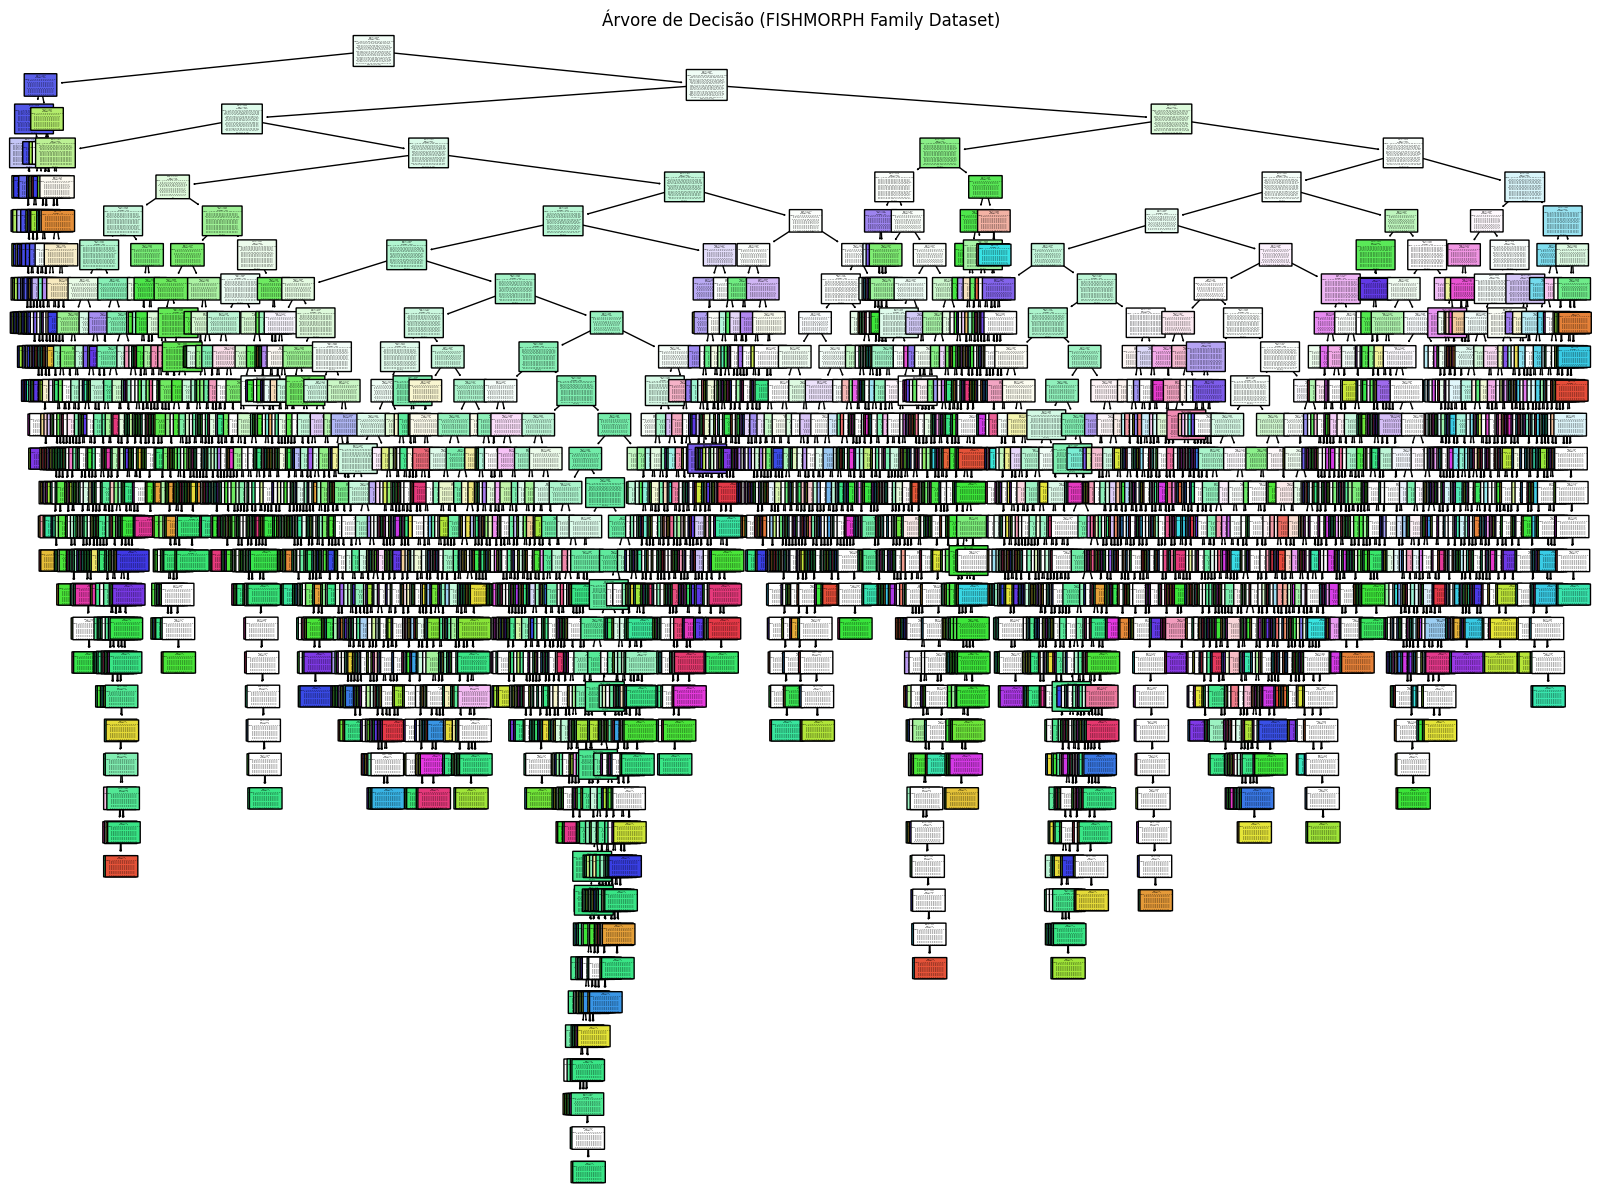

In [ ]:
# Visualizar a árvore de decisão para FISHMORPH (Family)
plt.figure(figsize=(20, 15)) # Ajuste o tamanho conforme necessário para melhor visualização
# Obter os nomes das classes diretamente dos valores únicos da coluna alvo
class_names_family = y_family.unique().astype(str).tolist()

plot_tree(dtree_family, filled=True, feature_names=X_family_encoded.columns, class_names=class_names_family, rounded=True)
plt.title("Árvore de Decisão (FISHMORPH Family Dataset)")
plt.show()

# Visualização de uma Árvore da Floresta Aleatória (FISHMORPH Family)

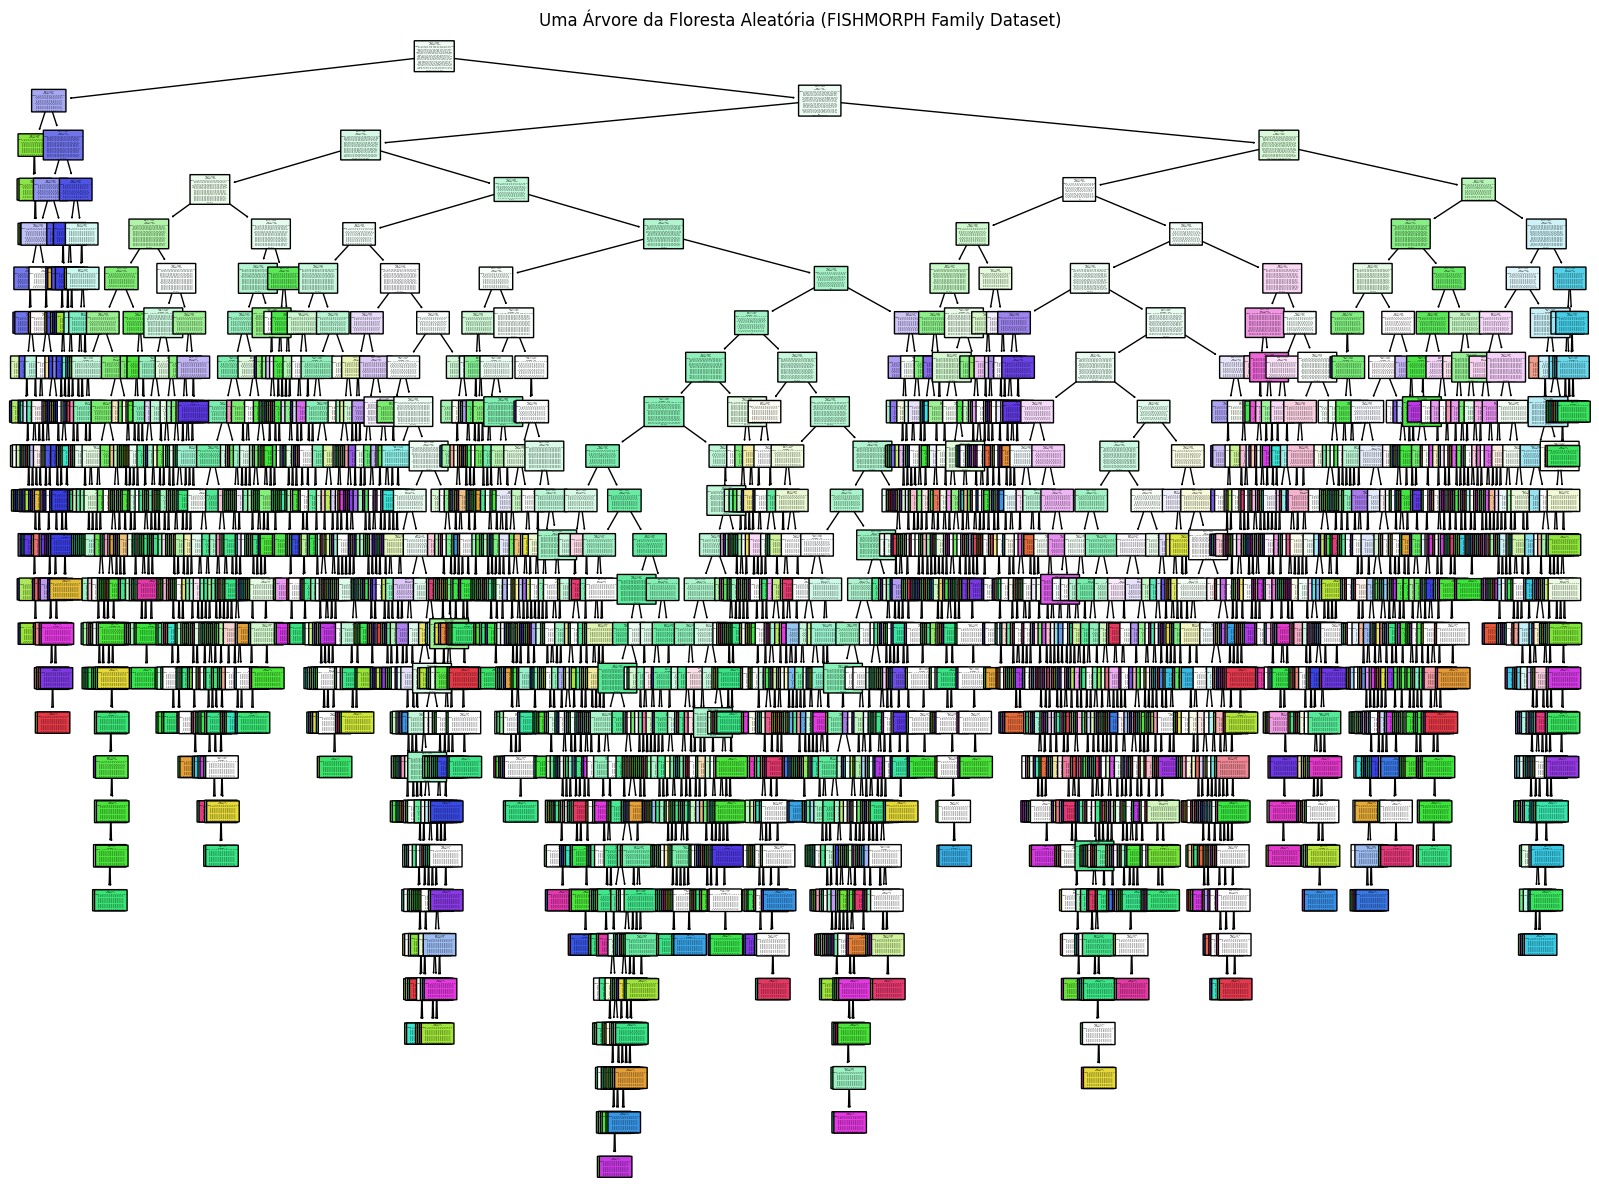

In [ ]:
# Visualizar uma das árvores da floresta aleatória (por exemplo, a primeira árvore) para FISHMORPH (Family)
plt.figure(figsize=(20, 15)) # Ajuste o tamanho conforme necessário
estimator = rf_family.estimators_[0]  # Selecionando a primeira árvore da floresta
# Obter os nomes das classes diretamente dos valores únicos da coluna alvo
class_names_family = y_family.unique().astype(str).tolist()

plot_tree(estimator, filled=True, feature_names=X_family_encoded.columns, class_names=class_names_family, rounded=True)
plt.title("Uma Árvore da Floresta Aleatória (FISHMORPH Family Dataset)")
plt.show()